## TSFs Task 6 by Naman Jain

### Prediction using Decision Tree Algorithm

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn import datasets

In [2]:
data = pd.read_csv("Iris.csv")
print('Data Saved and Loaded Successfully')

Data Saved and Loaded Successfully


In [5]:
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
83,84,6.0,2.7,5.1,1.6,Iris-versicolor
35,36,5.0,3.2,1.2,0.2,Iris-setosa
132,133,6.4,2.8,5.6,2.2,Iris-virginica
73,74,6.1,2.8,4.7,1.2,Iris-versicolor
49,50,5.0,3.3,1.4,0.2,Iris-setosa


### **Basic Insights of the Data** 

In [6]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### **Label Encoding**

In [11]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data['spc_code'] = lb_make.fit_transform(data.Species)

In [13]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,spc_code
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


### **Data Visualization**

Text(0.5, 1.0, 'scatter')

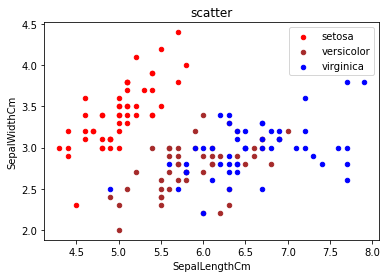

In [16]:
ax = data[data.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='brown', label='versicolor', ax=ax)
data[data.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")

Text(0.5, 1.0, 'scatter')

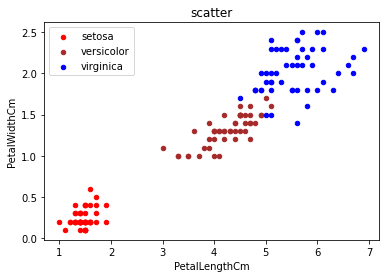

In [17]:
ax = data[data.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                    color='red', label='setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                color='brown', label='versicolor', ax=ax)
data[data.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")

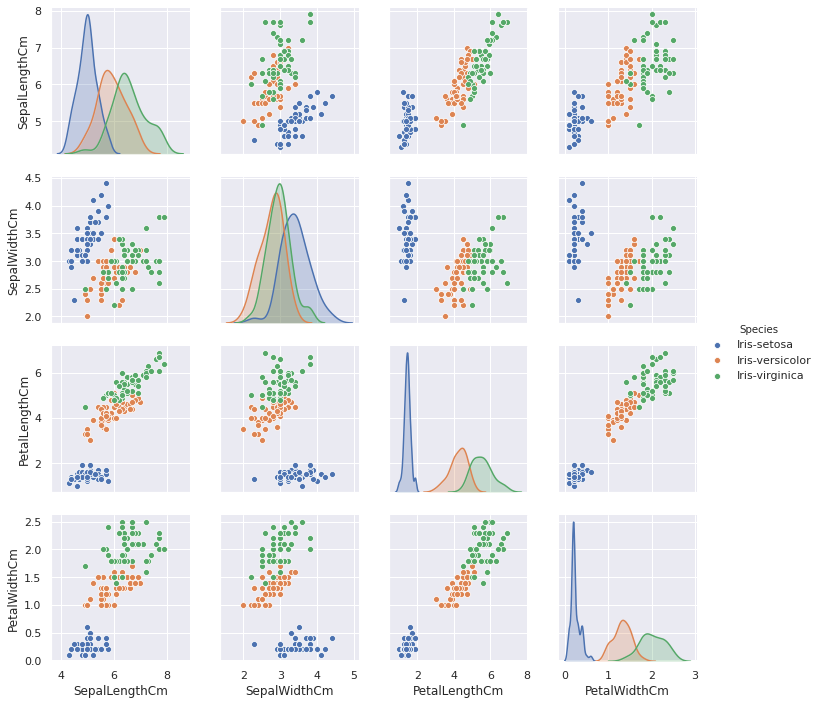

In [18]:
sns.set()
sns.pairplot(data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']],hue="Species", diag_kind="kde")

### **Train, Test, Split and Modelling**

In [19]:
X = data.iloc[:,1:5].values
y = data['spc_code'].values

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=0)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((135, 4), (15, 4), (135,), (15,))

In [21]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
pred = clf.predict(X_test)

df = pd.DataFrame({"Orignal":y_test,'Predicted':pred})

In [23]:
df

,Orignal,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1


We got an accuracy score of : 100.0 %

 CONFUSION MATRIX :


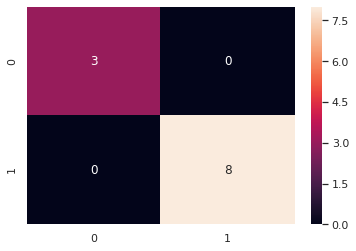

In [24]:
acc = accuracy_score(y_test, pred)
con_mat = confusion_matrix(y_test, pred, [0, 1])
print('We got an accuracy score of : {} %'.format(acc*100))
sns.heatmap(con_mat,annot=True)
print('\n CONFUSION MATRIX :')
plt.show()